# Import libraries

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
import seaborn as sns
sns.set(font_scale = 2)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

# Reading dataset

In [244]:
monkeypox_dataset = pd.read_csv('/content/Monkeypox Coursework Dataset.csv')

# Data Understanding: Analayse the data



In [245]:
monkeypox_dataset.head(10)

,Test ID,Systemic Illness,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Home ownership,Age,Month of Birth,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result
0,AA0021,None,0.0,0.0,1,1.0,1,0,1.0,0.0,5363690,9382,1,37,10,0,0.0,Negative
1,AA0022,Fever,1.0,1.0,0,1.0,1,0,0.0,1.0,5797376,7891,0,24,7,1,0.0,Positive
2,AA0023,Fever,1.0,0.0,1,1.0,0,0,0.0,1.0,4509503,9424,0,34,11,1,0.0,Positive
3,AA0024,None,0.0,1.0,0,0.0,0,1,1.0,1.0,4613306,4608,1,40,3,0,0.0,Positive
4,AA0025,Swollen Lymph Nodes,3.0,1.0,1,1.0,0,0,1.0,1.0,5423126,10668,1,36,8,0,0.0,Positive
5,AA0026,Swollen Lymph Nodes,3.0,0.0,1,0.0,0,0,0.0,0.0,5707560,7830,0,30,9,0,0.0,Negative
6,AA0027,Fever,1.0,0.0,1,0.0,0,0,0.0,1.0,4659279,6888,0,40,7,0,0.0,Positive
7,AA0028,Fever,1.0,1.0,1,0.0,1,1,1.0,0.0,5430587,9905,0,23,5,1,0.0,Positive
8,AA0029,Muscle Aches and Pain,2.0,0.0,1,1.0,1,0,0.0,0.0,4197439,8707,1,41,10,0,0.0,Positive
9,AA0030,Fever,1.0,0.0,0,1.0,1,1,0.0,1.0,5342237,4703,0,30,1,0,0.0,Negative


In [246]:
monkeypox_dataset.tail(10)

,Test ID,Systemic Illness,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Home ownership,Age,Month of Birth,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result
24990,AH33687,Muscle Aches and Pain,2.0,0.0,0,1.0,1,0,0.0,1.0,4845506,6084,1,33,9,1,0.0,Negative
24991,AH33688,Fever,1.0,0.0,1,0.0,0,1,0.0,1.0,5138633,5035,1,37,6,0,1.0,Positive
24992,AH33689,None,0.0,1.0,0,1.0,0,0,0.0,0.0,4488543,7251,0,42,12,1,1.0,Negative
24993,AH33690,None,0.0,1.0,1,1.0,0,0,0.0,0.0,4533912,8314,0,33,2,1,1.0,Positive
24994,AH33691,Fever,1.0,0.0,1,1.0,0,0,0.0,1.0,5747771,9365,1,39,7,0,1.0,Positive
24995,AH33692,None,0.0,1.0,1,0.0,1,1,0.0,0.0,5774935,9537,1,56,1,0,1.0,Positive
24996,AH33693,Fever,1.0,0.0,1,1.0,0,1,1.0,1.0,4719924,7596,1,50,10,1,1.0,Positive
24997,AH33694,None,0.0,1.0,1,0.0,0,1,1.0,0.0,4254616,10949,0,24,12,1,0.0,Positive
24998,AH33695,Swollen Lymph Nodes,3.0,0.0,1,0.0,1,1,1.0,0.0,5440155,6006,1,56,9,1,0.0,Negative
24999,AH33696,Swollen Lymph Nodes,3.0,0.0,0,1.0,0,0,1.0,1.0,5398533,7850,0,47,7,0,0.0,Positive


In [247]:
monkeypox_dataset.columns

Index(['Test ID', 'Systemic Illness', 'Encoded Systemic Illness',
       'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions',
       'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection',
       'Red blood cells count', 'White blood cells count', 'Home ownership',
       'Age', 'Month of Birth', 'Health Insurance',
       'Sexually Transmitted Infection', 'MPOX PCR Result'],
      dtype='object')

# Dropping unwanted columns



In [248]:
df = monkeypox_dataset.copy()

In [249]:
df.drop(columns=['Test ID', 'Systemic Illness'], inplace=True)

In [250]:
df = df.rename(columns={'Red blood cells count': 'RBC Count', 'White blood cells count': 'WBC Count', 'Month of Birth': 'Birth Month'})

In [251]:
df.head()

,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,RBC Count,WBC Count,Home ownership,Age,Birth Month,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result
0,0.0,0.0,1,1.0,1,0,1.0,0.0,5363690,9382,1,37,10,0,0.0,Negative
1,1.0,1.0,0,1.0,1,0,0.0,1.0,5797376,7891,0,24,7,1,0.0,Positive
2,1.0,0.0,1,1.0,0,0,0.0,1.0,4509503,9424,0,34,11,1,0.0,Positive
3,0.0,1.0,0,0.0,0,1,1.0,1.0,4613306,4608,1,40,3,0,0.0,Positive
4,3.0,1.0,1,1.0,0,0,1.0,1.0,5423126,10668,1,36,8,0,0.0,Positive


In [252]:
print(df.columns.tolist())

['Encoded Systemic Illness', 'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection', 'RBC Count', 'WBC Count', 'Home ownership', 'Age', 'Birth Month', 'Health Insurance', 'Sexually Transmitted Infection', 'MPOX PCR Result']


In [253]:
print(monkeypox_dataset.columns.tolist())

['Test ID', 'Systemic Illness', 'Encoded Systemic Illness', 'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection', 'Red blood cells count', 'White blood cells count', 'Home ownership', 'Age', 'Month of Birth', 'Health Insurance', 'Sexually Transmitted Infection', 'MPOX PCR Result']


#Basic Statistical Description

In [254]:
df.describe()

,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Solitary Lesion,Swollen Tonsils,HIV Infection,RBC Count,WBC Count,Home ownership,Birth Month,Health Insurance,Sexually Transmitted Infection
count,24998.000000,24997.000000,25000.000000,24994.000000,25000.000000,24993.000000,24995.000000,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.000000,24996.000000
mean,1.497640,0.493819,0.502160,0.504441,0.501080,0.501260,0.503301,5.004591e+06,7749.114440,0.495600,6.517040,0.498480,0.497880
std,1.116872,0.499972,0.500005,0.499990,0.500009,0.500008,0.499999,5.204760e+05,1885.213591,0.499991,3.441038,0.500008,0.500006
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.100135e+06,4500.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.555418e+06,6116.000000,0.000000,4.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.002304e+06,7747.000000,0.000000,7.000000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.458530e+06,9379.000000,1.000000,10.000000,1.000000,1.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.899806e+06,11000.000000,1.000000,12.000000,1.000000,1.000000


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Encoded Systemic Illness        24998 non-null  float64
 1   Rectal Pain                     24997 non-null  float64
 2   Sore Throat                     25000 non-null  int64  
 3   Penile Oedema                   24994 non-null  float64
 4   Oral Lesions                    24996 non-null  object 
 5   Solitary Lesion                 25000 non-null  int64  
 6   Swollen Tonsils                 24993 non-null  float64
 7   HIV Infection                   24995 non-null  float64
 8   RBC Count                       25000 non-null  int64  
 9   WBC Count                       25000 non-null  int64  
 10  Home ownership                  25000 non-null  int64  
 11  Age                             24964 non-null  object 
 12  Birth Month                     

In [256]:
df.shape

(25000, 16)

# Plot distribution of class variable

Positive    0.63636
Negative    0.36364
Name: MPOX PCR Result, dtype: float64


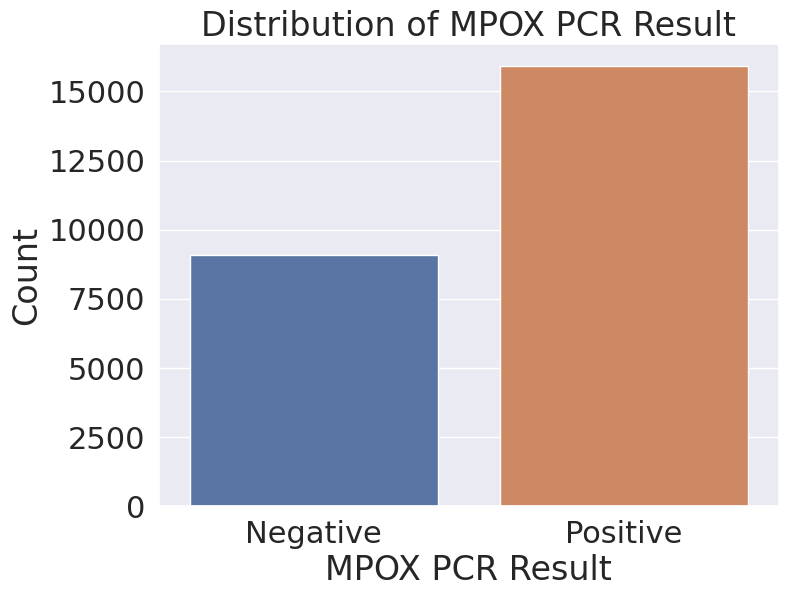

In [257]:
class_distribution = df['MPOX PCR Result'].value_counts(normalize=True)
print(class_distribution)

# Create a count plot using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='MPOX PCR Result', data=df)
plt.title('Distribution of MPOX PCR Result')
plt.xlabel('MPOX PCR Result')
plt.ylabel('Count')
plt.show()

# Checking and handling missing values

In [258]:
df.isnull().sum()

Encoded Systemic Illness           2
Rectal Pain                        3
Sore Throat                        0
Penile Oedema                      6
Oral Lesions                       4
Solitary Lesion                    0
Swollen Tonsils                    7
HIV Infection                      5
RBC Count                          0
WBC Count                          0
Home ownership                     0
Age                               36
Birth Month                        0
Health Insurance                   0
Sexually Transmitted Infection     4
MPOX PCR Result                    0
dtype: int64

In [259]:
df.isna().sum()/len(monkeypox_dataset)*100

Encoded Systemic Illness          0.008
Rectal Pain                       0.012
Sore Throat                       0.000
Penile Oedema                     0.024
Oral Lesions                      0.016
Solitary Lesion                   0.000
Swollen Tonsils                   0.028
HIV Infection                     0.020
RBC Count                         0.000
WBC Count                         0.000
Home ownership                    0.000
Age                               0.144
Birth Month                       0.000
Health Insurance                  0.000
Sexually Transmitted Infection    0.016
MPOX PCR Result                   0.000
dtype: float64

In [260]:
def missing_values_table(df):

        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing values', 1 : '% What is the percentage of the full column'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% What is the percentage of the full column', ascending=False).round(2)


        return mis_val_table_ren_columns

In [261]:
missing_values_table(df)

,Missing values,% What is the percentage of the full column
Age,36,0.14
Swollen Tonsils,7,0.03
Penile Oedema,6,0.02
HIV Infection,5,0.02
Oral Lesions,4,0.02
Sexually Transmitted Infection,4,0.02
Rectal Pain,3,0.01
Encoded Systemic Illness,2,0.01


In [262]:
df = df.replace({None: np.nan})

In [263]:
nan_rows = df[df.isnull().any(axis=1)]

print("Rows with NaN or empty values:")
display(nan_rows)

Rows with NaN or empty values:


,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,RBC Count,WBC Count,Home ownership,Age,Birth Month,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result
27,0.0,0.0,1,NaN,0,1,1.0,1.0,4575169,7879,1,61,2,0,1.0,Positive
28,0.0,0.0,0,NaN,1,1,0.0,1.0,4366768,7425,0,61,12,0,0.0,Negative
38,1.0,1.0,1,1.0,0,0,NaN,0.0,4885900,8214,0,47,10,0,1.0,Negative
39,2.0,1.0,0,1.0,0,0,NaN,0.0,5118075,9008,0,25,2,0,0.0,Positive
40,2.0,0.0,1,1.0,1,1,NaN,0.0,4190283,5577,0,58,8,0,0.0,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,3.0,1.0,1,1.0,0,0,0.0,1.0,4126045,9710,1,NaN,10,0,0.0,Positive
1931,0.0,0.0,0,1.0,1,0,0.0,0.0,4375507,5176,0,NaN,9,0,0.0,Negative
1932,0.0,1.0,0,0.0,0,1,1.0,0.0,5788803,6309,1,NaN,1,1,1.0,Negative
1933,2.0,0.0,1,1.0,0,1,1.0,1.0,4880807,9213,0,NaN,11,0,1.0,Positive


In [264]:
nan_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 27 to 1934
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Encoded Systemic Illness        64 non-null     float64
 1   Rectal Pain                     63 non-null     float64
 2   Sore Throat                     66 non-null     int64  
 3   Penile Oedema                   60 non-null     float64
 4   Oral Lesions                    62 non-null     object 
 5   Solitary Lesion                 66 non-null     int64  
 6   Swollen Tonsils                 59 non-null     float64
 7   HIV Infection                   61 non-null     float64
 8   RBC Count                       66 non-null     int64  
 9   WBC Count                       66 non-null     int64  
 10  Home ownership                  66 non-null     int64  
 11  Age                             30 non-null     object 
 12  Birth Month                     66 

In [265]:
data = df.copy()

In [266]:
df.tail(10)

,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,RBC Count,WBC Count,Home ownership,Age,Birth Month,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result
24990,2.0,0.0,0,1.0,1,0,0.0,1.0,4845506,6084,1,33,9,1,0.0,Negative
24991,1.0,0.0,1,0.0,0,1,0.0,1.0,5138633,5035,1,37,6,0,1.0,Positive
24992,0.0,1.0,0,1.0,0,0,0.0,0.0,4488543,7251,0,42,12,1,1.0,Negative
24993,0.0,1.0,1,1.0,0,0,0.0,0.0,4533912,8314,0,33,2,1,1.0,Positive
24994,1.0,0.0,1,1.0,0,0,0.0,1.0,5747771,9365,1,39,7,0,1.0,Positive
24995,0.0,1.0,1,0.0,1,1,0.0,0.0,5774935,9537,1,56,1,0,1.0,Positive
24996,1.0,0.0,1,1.0,0,1,1.0,1.0,4719924,7596,1,50,10,1,1.0,Positive
24997,0.0,1.0,1,0.0,0,1,1.0,0.0,4254616,10949,0,24,12,1,0.0,Positive
24998,3.0,0.0,1,0.0,1,1,1.0,0.0,5440155,6006,1,56,9,1,0.0,Negative
24999,3.0,0.0,0,1.0,0,0,1.0,1.0,5398533,7850,0,47,7,0,0.0,Positive


In [267]:
# Drop rows with NaN values
df_cleaned = data.dropna(how='any')
display(df_cleaned)

,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,RBC Count,WBC Count,Home ownership,Age,Birth Month,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result
0,0.0,0.0,1,1.0,1,0,1.0,0.0,5363690,9382,1,37,10,0,0.0,Negative
1,1.0,1.0,0,1.0,1,0,0.0,1.0,5797376,7891,0,24,7,1,0.0,Positive
2,1.0,0.0,1,1.0,0,0,0.0,1.0,4509503,9424,0,34,11,1,0.0,Positive
3,0.0,1.0,0,0.0,0,1,1.0,1.0,4613306,4608,1,40,3,0,0.0,Positive
4,3.0,1.0,1,1.0,0,0,1.0,1.0,5423126,10668,1,36,8,0,0.0,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.0,1.0,1,0.0,1,1,0.0,0.0,5774935,9537,1,56,1,0,1.0,Positive
24996,1.0,0.0,1,1.0,0,1,1.0,1.0,4719924,7596,1,50,10,1,1.0,Positive
24997,0.0,1.0,1,0.0,0,1,1.0,0.0,4254616,10949,0,24,12,1,0.0,Positive
24998,3.0,0.0,1,0.0,1,1,1.0,0.0,5440155,6006,1,56,9,1,0.0,Negative


In [268]:
df_cleaned.isnull().sum()

Encoded Systemic Illness          0
Rectal Pain                       0
Sore Throat                       0
Penile Oedema                     0
Oral Lesions                      0
Solitary Lesion                   0
Swollen Tonsils                   0
HIV Infection                     0
RBC Count                         0
WBC Count                         0
Home ownership                    0
Age                               0
Birth Month                       0
Health Insurance                  0
Sexually Transmitted Infection    0
MPOX PCR Result                   0
dtype: int64

In [269]:
missing_values_table(df_cleaned)

,Missing values,% What is the percentage of the full column


In [270]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24934 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Encoded Systemic Illness        24934 non-null  float64
 1   Rectal Pain                     24934 non-null  float64
 2   Sore Throat                     24934 non-null  int64  
 3   Penile Oedema                   24934 non-null  float64
 4   Oral Lesions                    24934 non-null  object 
 5   Solitary Lesion                 24934 non-null  int64  
 6   Swollen Tonsils                 24934 non-null  float64
 7   HIV Infection                   24934 non-null  float64
 8   RBC Count                       24934 non-null  int64  
 9   WBC Count                       24934 non-null  int64  
 10  Home ownership                  24934 non-null  int64  
 11  Age                             24934 non-null  object 
 12  Birth Month                     

# Addressing features with a data type of 'object

*   'Oral Lesions' column has mix of categorical and
numerical values
*   Identify and display records with non-numeric values in the 'Age' column
*   Converting 'MPOX PCR Result' categorical values into numeric (0, 1)





In [271]:
# Display only the records with 'Yes' or 'No' in the 'Oral Lesions' column
selected_records = df_cleaned.loc[df_cleaned['Oral Lesions'].isin(['YES', 'No']), 'Oral Lesions']

print("Records with 'Yes' or 'No' in the 'Oral Lesions' column:")
print(selected_records)

Records with 'Yes' or 'No' in the 'Oral Lesions' column:
332    YES
412    YES
489    YES
532    YES
591     No
597     No
630     No
655     No
707     No
732     No
760     No
Name: Oral Lesions, dtype: object


In [272]:
# Convert text values to numerical values
df_replaced = df_cleaned.copy()

# Replace 'YES' with 1 and 'No' with 0 in the 'Oral Lesions' column
df_replaced['Oral Lesions'] = df_replaced['Oral Lesions'].replace({'YES': 1, 'No': 0})

# Display only the records with 'Yes' or 'No' in the 'Oral Lesions' column
selected_records = df_replaced[df_replaced['Oral Lesions'].isin([1, 0])]

print("Records with 'Yes' or 'No' in the 'Oral Lesions' column:")
print(selected_records['Oral Lesions'])

# Print the unique values in the 'Oral Lesions' column
print("Unique values in the 'Oral Lesions' column:")
print(df_replaced['Oral Lesions'].unique())

Records with 'Yes' or 'No' in the 'Oral Lesions' column:
332    1
412    1
489    1
532    1
591    0
597    0
630    0
655    0
707    0
732    0
760    0
Name: Oral Lesions, dtype: object
Unique values in the 'Oral Lesions' column:
['1' '0' 1 0]


In [273]:
# Identify and display records with non-numeric values in the 'Age' column
non_numeric_records = df_replaced[pd.to_numeric(df['Age'], errors='coerce').isna()]

print("Records with non-numeric values in the 'Age' column:")
print(non_numeric_records['Age'])

Records with non-numeric values in the 'Age' column:
323    Twenty
Name: Age, dtype: object


<ipython-input-273-f9f1dc49f9c8>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  non_numeric_records = df_replaced[pd.to_numeric(df['Age'], errors='coerce').isna()]


In [274]:
# Replace 'Twenty' with 20 in the 'Age' column
df_replaced['Age'] = df_replaced['Age'].replace({'Twenty': 20})

In [275]:
# Identify and display records with non-numeric values in the 'Age' column
non_numeric_records = df_replaced[pd.to_numeric(df['Age'], errors='coerce').isna()]

print("Records with non-numeric values in the 'Age' column:")
print(non_numeric_records['Age'])

Records with non-numeric values in the 'Age' column:
323    20
Name: Age, dtype: object


<ipython-input-275-f9f1dc49f9c8>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  non_numeric_records = df_replaced[pd.to_numeric(df['Age'], errors='coerce').isna()]


In [276]:
print(df_replaced['Age'].unique())
#df_replaced.head()

['37' '24' '34' '40' '36' '30' '23' '41' '32' '46' '27' '47' '53' '31'
 '25' '26' '52' '51' '56' '39' '35' '50' '33' '28' '45' '38' '57' '55'
 '43' '60' '61' '42' '59' '44' '48' '49' '58' '54' '150' '29' '0' 20 '181'
 '-23']


In [277]:
print(df_replaced['MPOX PCR Result'].unique())

['Negative' 'Positive']


In [278]:
df_replaced['MPOX PCR Result']

0        Negative
1        Positive
2        Positive
3        Positive
4        Positive
           ...   
24995    Positive
24996    Positive
24997    Positive
24998    Negative
24999    Positive
Name: MPOX PCR Result, Length: 24934, dtype: object

In [279]:
from sklearn.preprocessing import LabelEncoder
# Assuming 'target' is your target variable containing 'positive' and 'negative'
label_encoder = LabelEncoder()
encoded_target = label_encoder.fit_transform(df_replaced['MPOX PCR Result'])
df_replaced['MPOX PCR Result'] = encoded_target

In [280]:
print(df_replaced['MPOX PCR Result'].unique())

[0 1]


In [281]:
# Replace 'Positive' with 1 and 'Negative' with 0 in the MPOX PCR Result column
#df_replaced['MPOX PCR Result'] = df_replaced['MPOX PCR Result'].replace({'Negative': 0, 'Positive' : 1})

#print(df_replaced['MPOX PCR Result'].unique())

In [282]:
df_replaced.head()

,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,RBC Count,WBC Count,Home ownership,Age,Birth Month,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result
0,0.0,0.0,1,1.0,1,0,1.0,0.0,5363690,9382,1,37,10,0,0.0,0
1,1.0,1.0,0,1.0,1,0,0.0,1.0,5797376,7891,0,24,7,1,0.0,1
2,1.0,0.0,1,1.0,0,0,0.0,1.0,4509503,9424,0,34,11,1,0.0,1
3,0.0,1.0,0,0.0,0,1,1.0,1.0,4613306,4608,1,40,3,0,0.0,1
4,3.0,1.0,1,1.0,0,0,1.0,1.0,5423126,10668,1,36,8,0,0.0,1


# Dealing with Outliers

*   Identifying Outlier for Age column
*   Checking if there is Outliers in "RBC Count" and "WBC Count" columns



## Identifying Outlier for Age column

In [283]:
data = df_replaced.copy()

In [284]:
# Convert the 'Age' column to numeric format
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

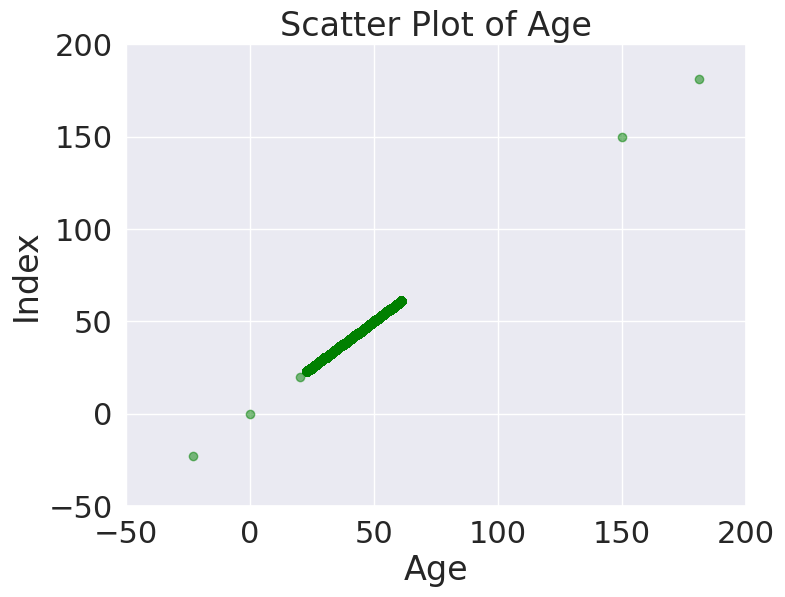

In [285]:
# Create a scatter plot for 'Age' to visualize outliers
plt.figure(figsize=(8, 6))
plt.scatter(x=data['Age'], y=data['Age'], alpha=0.5, color='green', marker='o')
plt.title('Scatter Plot of Age')
plt.xlabel('Age')
plt.ylabel('Index')
# Set x and y-axis limits
plt.xlim(-50, 200)
plt.ylim(-50, 200)
plt.show()

Identified outlier values:
[0, -23, 150, 181]


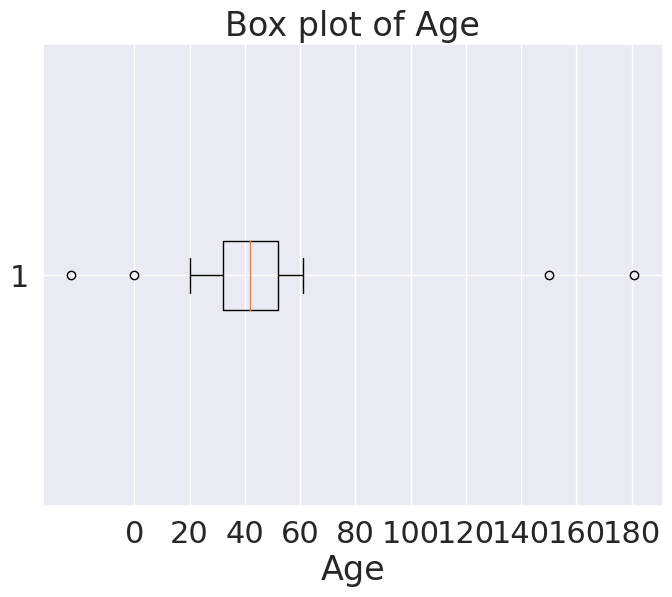

In [286]:
# Create a box plot for the 'Age' column
plt.figure(figsize=(8, 6))
box = plt.boxplot(data['Age'].dropna(), vert=False)
plt.title('Box plot of Age')
plt.xlabel('Age')

# Access the identified outlier values
outliers = [flier.get_xdata() for flier in box['fliers']]
outliers = [item for sublist in outliers for item in sublist]

# Adjust the x-axis ticks to display every 20 units
plt.xticks(range(0, 200, 20))

# Print the identified outlier values
print("Identified outlier values:")
print(outliers)

plt.show()

In [287]:
data['Age'].describe()

count    24934.000000
mean        42.058314
std         11.254470
min        -23.000000
25%         32.000000
50%         42.000000
75%         52.000000
max        181.000000
Name: Age, dtype: float64

In [288]:
# Filter out negative values from the 'Age' column
data = data[data['Age'] > 0]

# Calculate the first and third quartiles for the 'Age' column
first_quartile = data['Age'].describe()['25%']
third_quartile = data['Age'].describe()['75%']

# Compute the interquartile range (IQR)
iqr = third_quartile - first_quartile
print(iqr)

# Define the boundaries for outliers
lower_bound = first_quartile - 3 * iqr
upper_bound = third_quartile + 3 * iqr
print(lower_bound)
print(upper_bound)
# Filter the DataFrame to exclude outliers
data = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]


#data = data[(data['Age'] > (first_quartile - 3 * iqr)) &
#            (data['Age'] < (third_quartile + 3 * iqr))]

20.0
-28.0
112.0


Identified outlier values:
[]


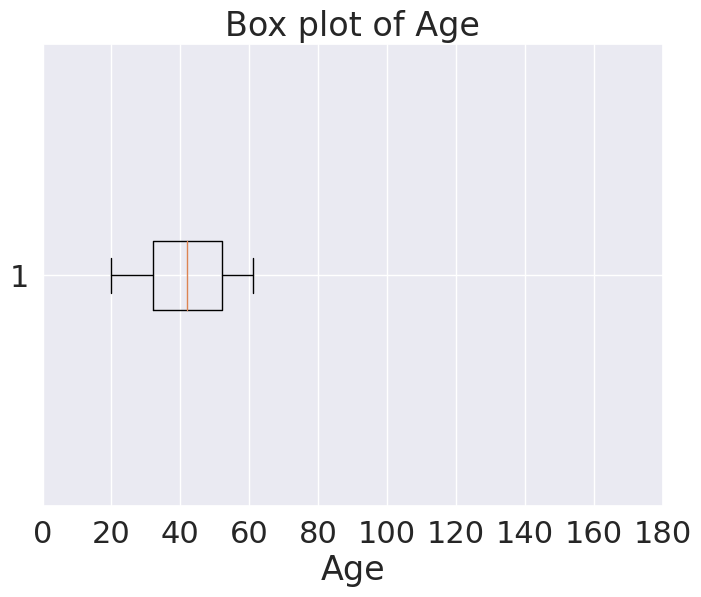

In [289]:
# Create a box plot for the 'Age' column
plt.figure(figsize=(8, 6))
box = plt.boxplot(data['Age'].dropna(), vert=False)
plt.title('Box plot of Age')
plt.xlabel('Age')

# Access the identified outlier values
outliers = [flier.get_xdata() for flier in box['fliers']]
outliers = [item for sublist in outliers for item in sublist]

# Adjust the x-axis ticks to display every 20 units
plt.xticks(range(0, 200, 20))

# Print the identified outlier values
print("Identified outlier values:")
print(outliers)

plt.show()

In [290]:
data['Age'].describe()

count    24930.000000
mean        42.052708
std         11.189320
min         20.000000
25%         32.000000
50%         42.000000
75%         52.000000
max         61.000000
Name: Age, dtype: float64

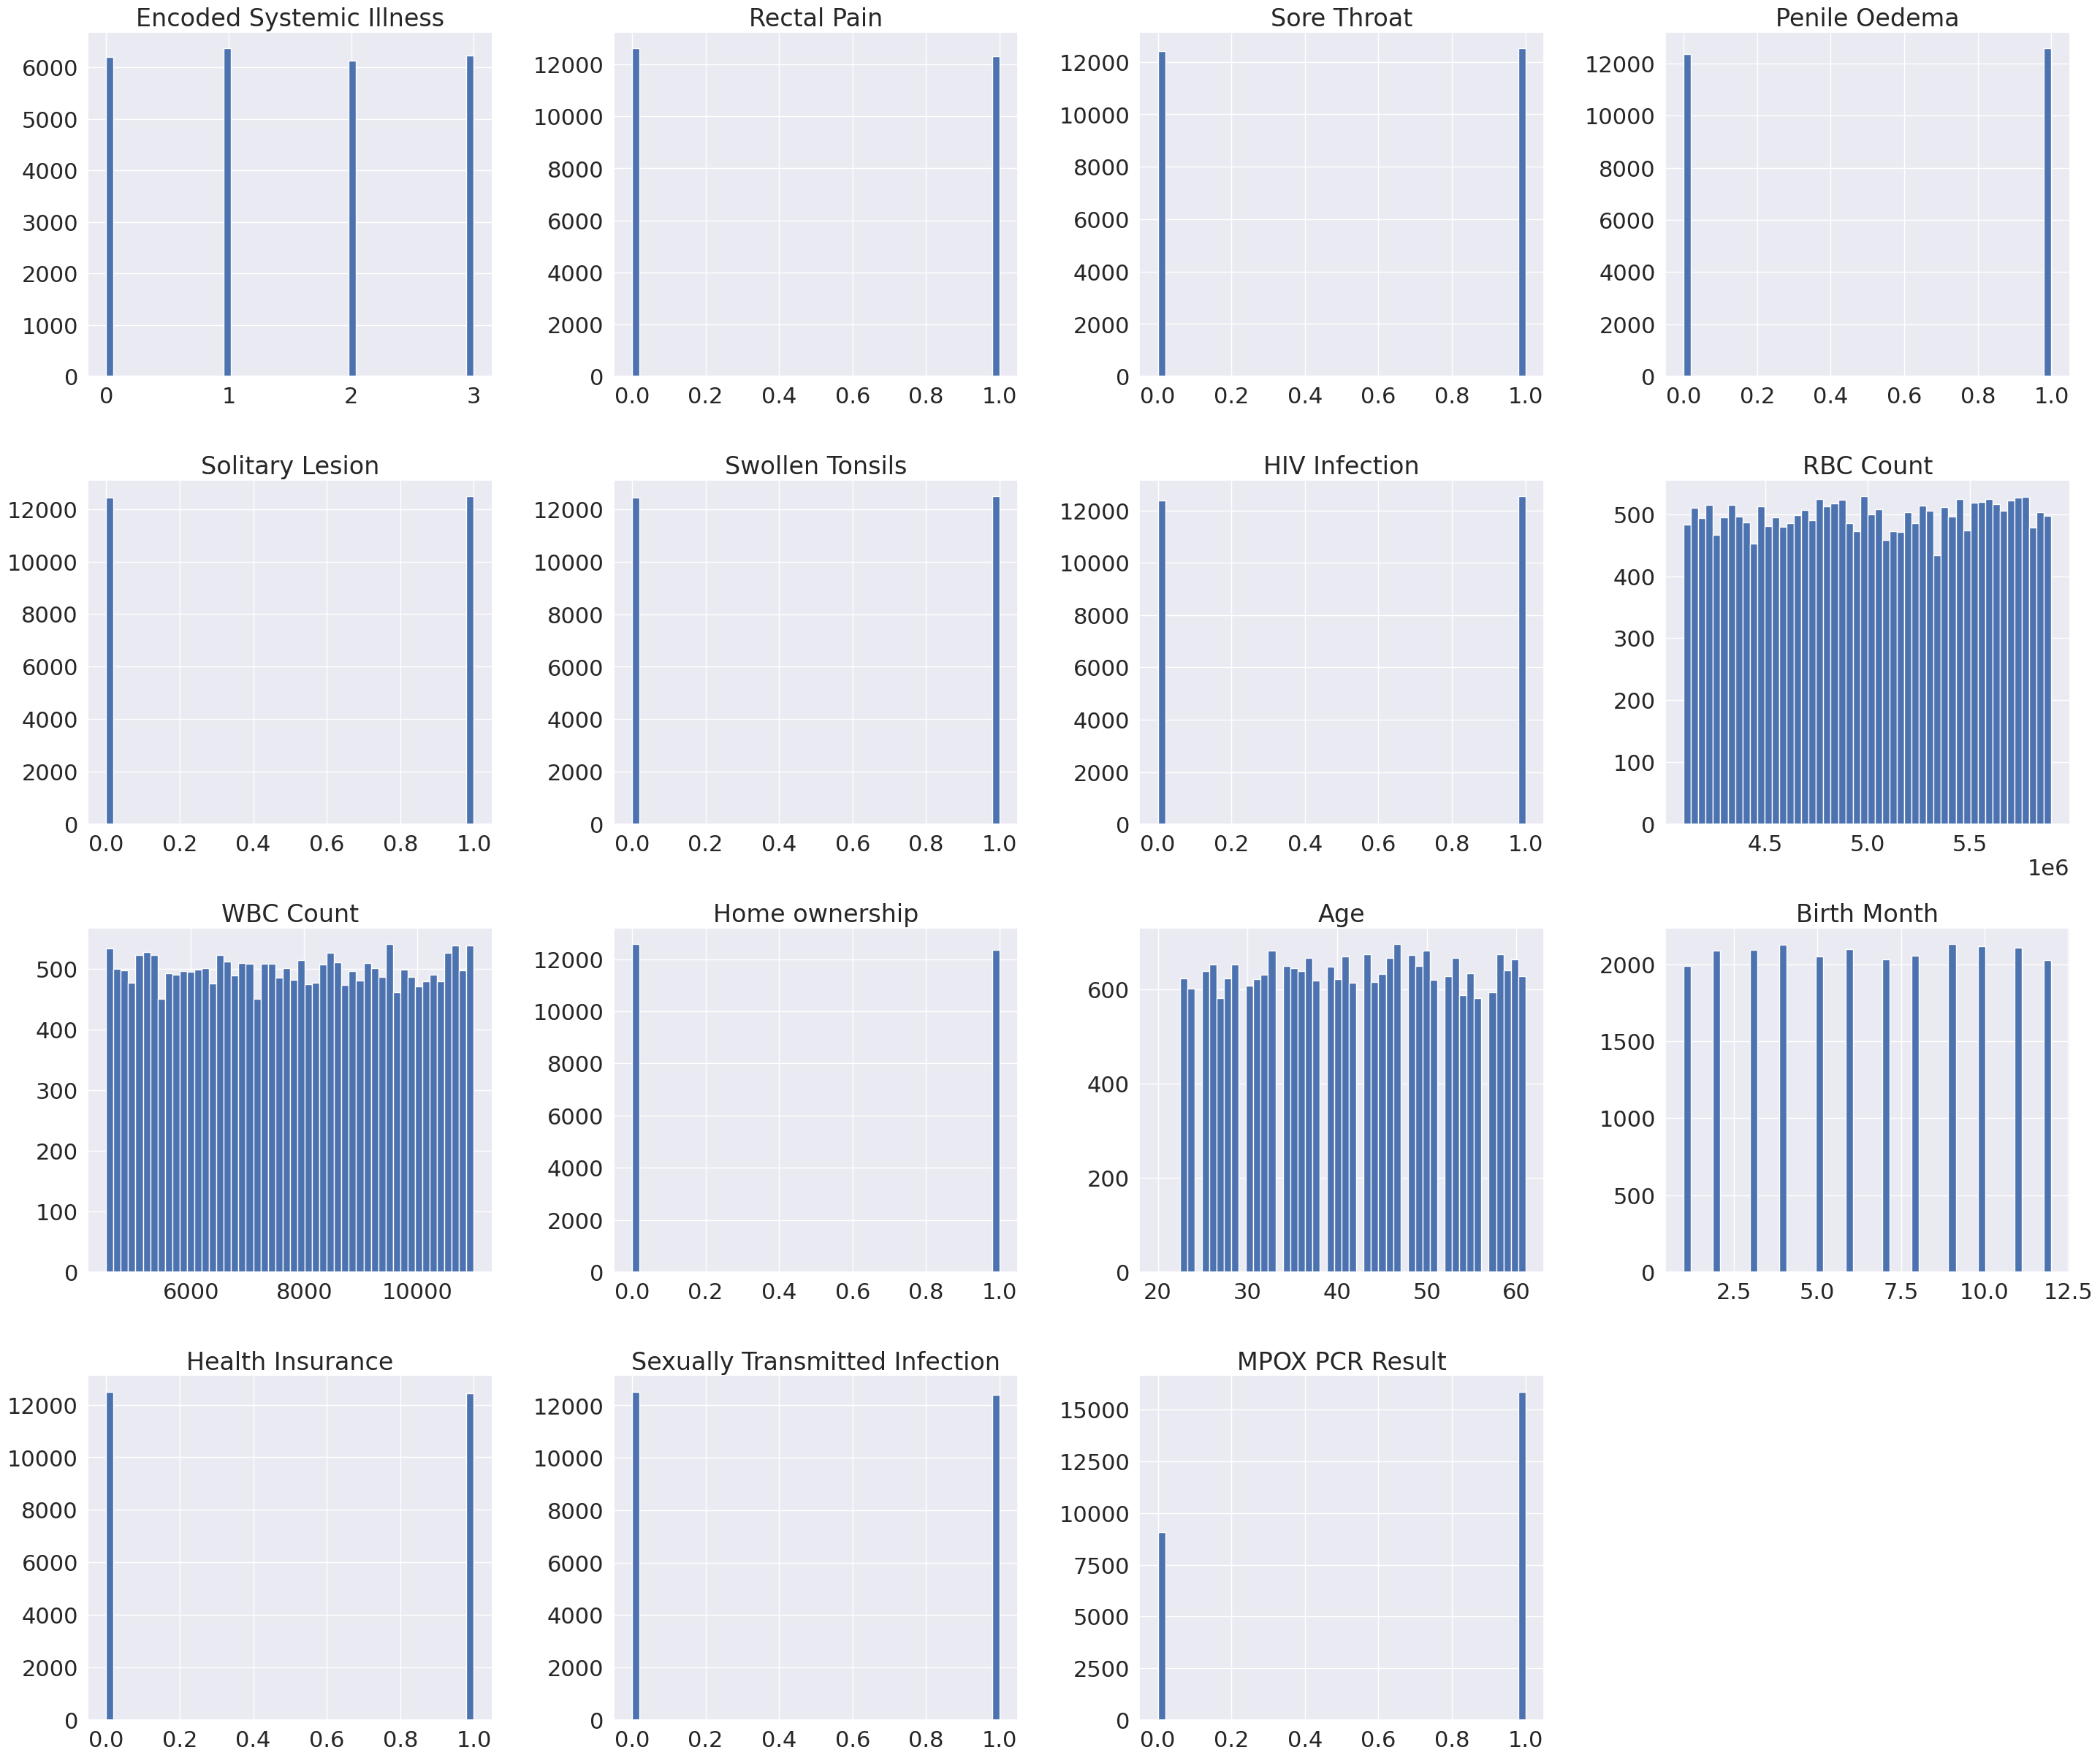

In [291]:
data.hist(figsize = (35,30), bins = 50)
plt.show()

## Checking if there is Outliers in "RBC Count" and "WBC Count" columns

In [292]:
data['RBC Count'].describe()

count    2.493000e+04
mean     5.004881e+06
std      5.204747e+05
min      4.100135e+06
25%      4.555666e+06
50%      5.002731e+06
75%      5.459270e+06
max      5.899806e+06
Name: RBC Count, dtype: float64

In [293]:
data['WBC Count'].describe()

count    24930.000000
mean      7749.005696
std       1885.348920
min       4500.000000
25%       6116.000000
50%       7746.000000
75%       9378.000000
max      11000.000000
Name: WBC Count, dtype: float64

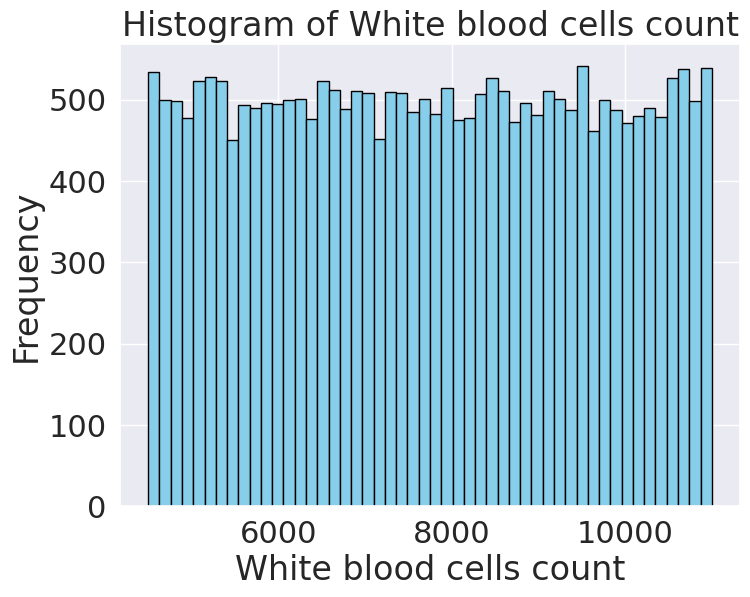

In [294]:
# Create a histogram to visualize the distribution of the 'White blood cells count' column
plt.figure(figsize=(8, 6))
plt.hist(data['WBC Count'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of White blood cells count')
plt.xlabel('White blood cells count')
plt.ylabel('Frequency')
plt.show()

# Converting all independent variables' dtypes into float64

In [295]:
data.dtypes

Encoded Systemic Illness          float64
Rectal Pain                       float64
Sore Throat                         int64
Penile Oedema                     float64
Oral Lesions                       object
Solitary Lesion                     int64
Swollen Tonsils                   float64
HIV Infection                     float64
RBC Count                           int64
WBC Count                           int64
Home ownership                      int64
Age                                 int64
Birth Month                         int64
Health Insurance                    int64
Sexually Transmitted Infection    float64
MPOX PCR Result                     int64
dtype: object

In [296]:
# List of all columns except the dependent feature
features_to_convert = [col for col in data.columns if col != 'MPOX PCR Result']

# Convert selected columns to float64 data type
data[features_to_convert] = data[features_to_convert].astype('float64')

In [297]:
data.dtypes

Encoded Systemic Illness          float64
Rectal Pain                       float64
Sore Throat                       float64
Penile Oedema                     float64
Oral Lesions                      float64
Solitary Lesion                   float64
Swollen Tonsils                   float64
HIV Infection                     float64
RBC Count                         float64
WBC Count                         float64
Home ownership                    float64
Age                               float64
Birth Month                       float64
Health Insurance                  float64
Sexually Transmitted Infection    float64
MPOX PCR Result                     int64
dtype: object

In [298]:
data.head()

,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,RBC Count,WBC Count,Home ownership,Age,Birth Month,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result
0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,5363690.0,9382.0,1.0,37.0,10.0,0.0,0.0,0
1,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,5797376.0,7891.0,0.0,24.0,7.0,1.0,0.0,1
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,4509503.0,9424.0,0.0,34.0,11.0,1.0,0.0,1
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,4613306.0,4608.0,1.0,40.0,3.0,0.0,0.0,1
4,3.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,5423126.0,10668.0,1.0,36.0,8.0,0.0,0.0,1


# Task (4) – Modelling: Create Predictive Classification Models

## Spliting data into input and output features

In [299]:
X=data.drop("MPOX PCR Result",axis=1)
y=data['MPOX PCR Result']

In [300]:
X

,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,RBC Count,WBC Count,Home ownership,Age,Birth Month,Health Insurance,Sexually Transmitted Infection
0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,5363690.0,9382.0,1.0,37.0,10.0,0.0,0.0
1,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,5797376.0,7891.0,0.0,24.0,7.0,1.0,0.0
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,4509503.0,9424.0,0.0,34.0,11.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,4613306.0,4608.0,1.0,40.0,3.0,0.0,0.0
4,3.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,5423126.0,10668.0,1.0,36.0,8.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,5774935.0,9537.0,1.0,56.0,1.0,0.0,1.0
24996,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,4719924.0,7596.0,1.0,50.0,10.0,1.0,1.0
24997,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,4254616.0,10949.0,0.0,24.0,12.0,1.0,0.0
24998,3.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,5440155.0,6006.0,1.0,56.0,9.0,1.0,0.0


## Get the list of feature names and the shape of the training data

In [301]:
# Get the list of feature names
feature_names = X.columns.tolist()
data_shape = X.shape

print("List of Feature Names:")
for feature in feature_names:
    print(feature)

print("\nData Shape:")
print(data_shape)

List of Feature Names:
Encoded Systemic Illness
Rectal Pain
Sore Throat
Penile Oedema
Oral Lesions
Solitary Lesion
Swollen Tonsils
HIV Infection
RBC Count
WBC Count
Home ownership
Age
Birth Month
Health Insurance
Sexually Transmitted Infection

Data Shape:
(24930, 15)


## Logistic Regression

In [302]:
#For Logistic Regression scaling is necessary
mms = MinMaxScaler()
X_scaled = mms.fit_transform(X)

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42,
                                                    shuffle=True)

In [304]:
# Check the class distribution ratio in the training and test sets
train_class_distribution = pd.Series(y_train).value_counts(normalize=True)
test_class_distribution = pd.Series(y_test).value_counts(normalize=True)

print("Training Set Class Distribution:")
print(train_class_distribution)

print("\nTest Set Class Distribution:")
print(test_class_distribution)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Training Set Class Distribution:
1    0.636411
0    0.363589
Name: MPOX PCR Result, dtype: float64

Test Set Class Distribution:
1    0.636315
0    0.363685
Name: MPOX PCR Result, dtype: float64
X_train shape: (17451, 15)
X_test shape: (7479, 15)
y_train shape: (17451,)
y_test shape: (7479,)


In [305]:
# import the Logistic Regression class
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [306]:
y_pred = logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 score:",metrics.f1_score(y_test, y_pred))
y_proba = logreg.predict_proba(X_test)[:, 1]
score = roc_auc_score(y_test, y_proba)
print(f"ROC AUC score: {score:.4f}")

Accuracy: 0.6705441903997861
Precision: 0.6855295068714632
Recall: 0.8909434755200673
F1 score: 0.7748538011695907
ROC AUC score: 0.6613


In [307]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 775, 1945],
       [ 519, 4240]])

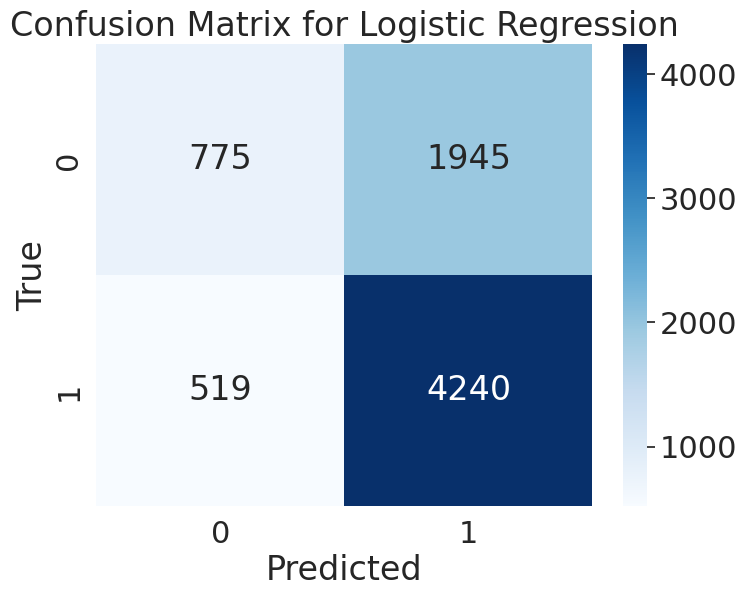

In [308]:
# Plot confusion matrix
class_names=logreg.classes_
plt.figure(figsize=(8, 6))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [309]:
from sklearn.metrics import classification_report
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 775 1945]
 [ 519 4240]]
              precision    recall  f1-score   support

           0       0.60      0.28      0.39      2720
           1       0.69      0.89      0.77      4759

    accuracy                           0.67      7479
   macro avg       0.64      0.59      0.58      7479
weighted avg       0.65      0.67      0.63      7479



In [310]:
# Calculate total number of records
total_records = len(y_test)
print(total_records)
# Calculate confusion matrix proportions
cm_proportions = metrics.confusion_matrix(y_test, y_pred) / total_records

# Interpretation of confusion matrix proportions
print("Confusion Matrix Proportions:")
print(cm_proportions)

7479
Confusion Matrix Proportions:
[[0.10362348 0.26006151]
 [0.0693943  0.56692071]]


##Naive Bayes with GaussianNB, BernoulliNB, MultinomialNB, ComplementNB

In [311]:
X

,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,RBC Count,WBC Count,Home ownership,Age,Birth Month,Health Insurance,Sexually Transmitted Infection
0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,5363690.0,9382.0,1.0,37.0,10.0,0.0,0.0
1,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,5797376.0,7891.0,0.0,24.0,7.0,1.0,0.0
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,4509503.0,9424.0,0.0,34.0,11.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,4613306.0,4608.0,1.0,40.0,3.0,0.0,0.0
4,3.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,5423126.0,10668.0,1.0,36.0,8.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,5774935.0,9537.0,1.0,56.0,1.0,0.0,1.0
24996,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,4719924.0,7596.0,1.0,50.0,10.0,1.0,1.0
24997,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,4254616.0,10949.0,0.0,24.0,12.0,1.0,0.0
24998,3.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,5440155.0,6006.0,1.0,56.0,9.0,1.0,0.0


In [312]:
# Normalization:
X_normalized = (X - np.min(X)) / (np.max(X) - np.min(X))

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [313]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized,
                                                    y,
                                                    test_size = 0.3,
                                                    stratify=y,
                                                    random_state = 42,
                                                    shuffle=True)

In [314]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, ComplementNB

In [315]:
def train_naive_bayes_classifiers(classifiers, X_train, y_train, X_test, y_test):
    results = {}

    for clf in classifiers:
        clf_name = clf.__class__.__name__

        try:
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            y_proba = clf.predict_proba(X_test)[:, 1]

            results[clf_name] = {
                'y_proba': y_proba,
                'y_pred': y_pred
            }

        except Exception as e:
            print(f"An error occurred with {clf_name}: {e}")

    return results

In [316]:
classifiers = [
    GaussianNB(),
    BernoulliNB(),
    MultinomialNB(),
    ComplementNB()
]

results = train_naive_bayes_classifiers(classifiers, X_train, y_train, X_test, y_test)

for clf_name, result in results.items():
    y_proba = result['y_proba']
    y_pred = result['y_pred']

    print(f"Classifier: {clf_name}")

    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    roc_auc = metrics.roc_auc_score(y_test, y_proba)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))
    print("------------------------")

Classifier: GaussianNB
Accuracy: 0.6721
Precision: 0.6844
Recall: 0.8996
F1 Score: 0.7774
ROC AUC Score: 0.6613
Number of mislabeled points out of a total 7479 points : 2452
------------------------
Classifier: BernoulliNB
Accuracy: 0.6723
Precision: 0.6859
Recall: 0.8947
F1 Score: 0.7765
ROC AUC Score: 0.6659
Number of mislabeled points out of a total 7479 points : 2451
------------------------
Classifier: MultinomialNB
Accuracy: 0.6364
Precision: 0.6364
Recall: 1.0000
F1 Score: 0.7778
ROC AUC Score: 0.6247
Number of mislabeled points out of a total 7479 points : 2719
------------------------
Classifier: ComplementNB
Accuracy: 0.5913
Precision: 0.7165
Recall: 0.5917
F1 Score: 0.6482
ROC AUC Score: 0.6247
Number of mislabeled points out of a total 7479 points : 3057
------------------------


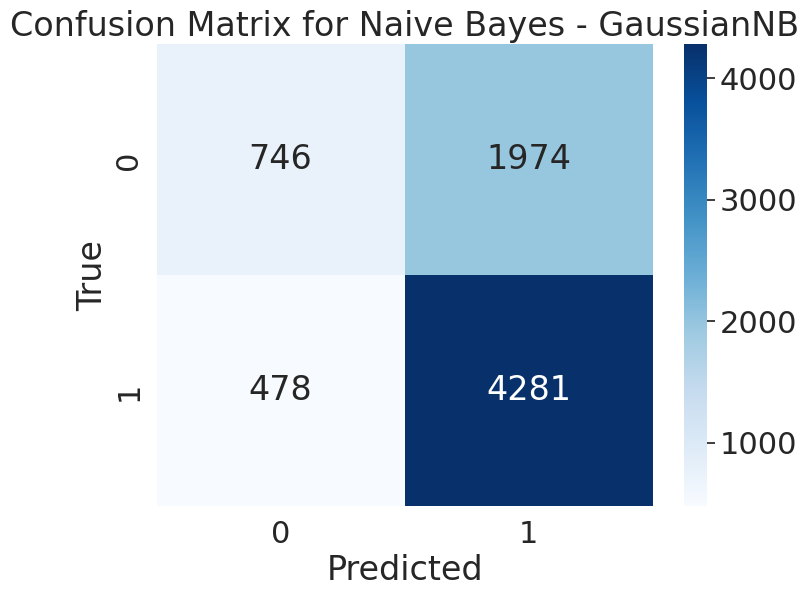

[[ 746 1974]
 [ 478 4281]]
[[ 746 1974]
 [ 478 4281]]


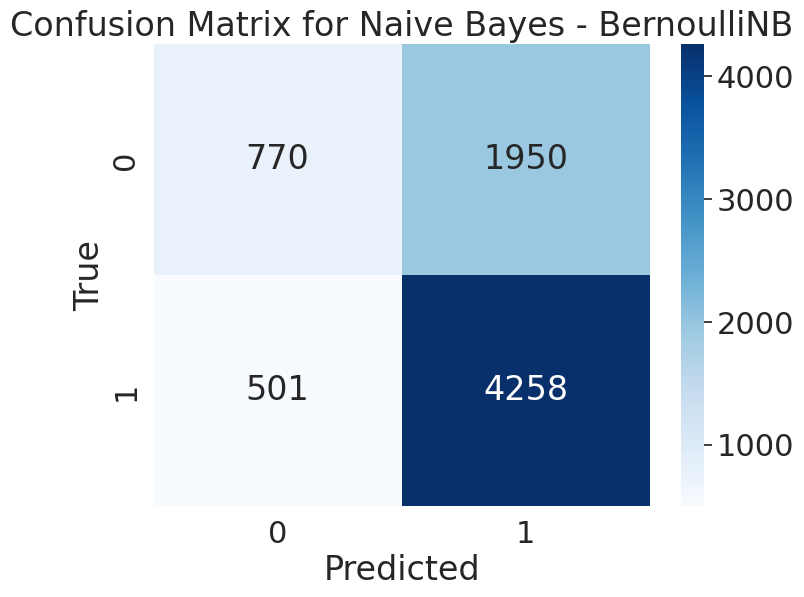

[[ 770 1950]
 [ 501 4258]]
[[ 770 1950]
 [ 501 4258]]


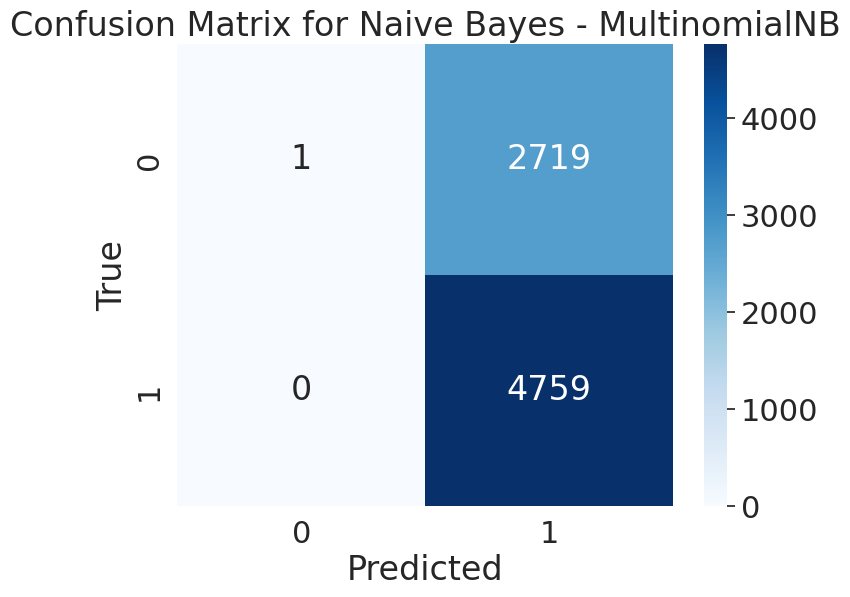

[[   1 2719]
 [   0 4759]]
[[   1 2719]
 [   0 4759]]


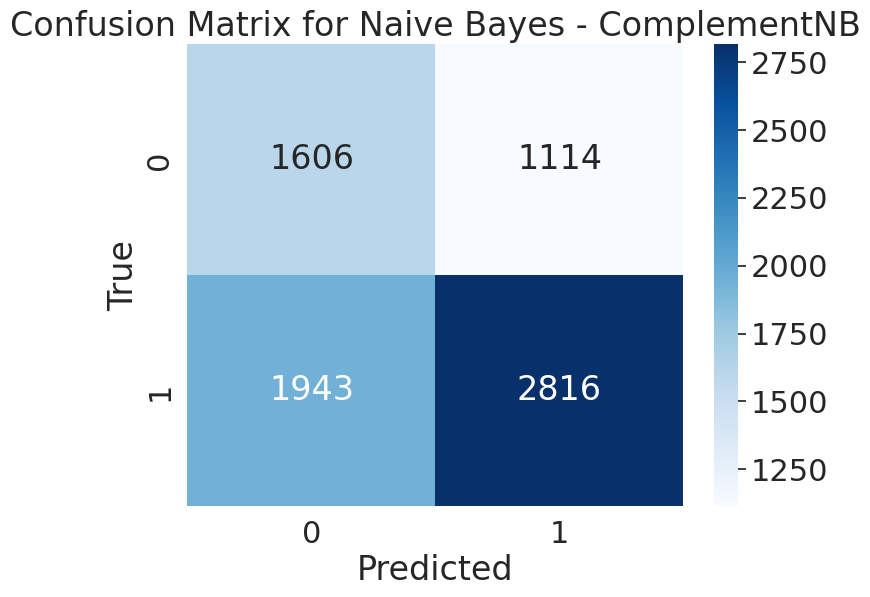

[[1606 1114]
 [1943 2816]]
[[1606 1114]
 [1943 2816]]


In [317]:
for clf_name, result in results.items():
    y_pred = result['y_pred']

    # Create a heatmap for the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for Naive Bayes - {clf_name}')
    plt.show()

    print(metrics.confusion_matrix(y_test, y_pred))
    print(metrics.confusion_matrix(y_test, y_pred))

##k-Nearest-Neighbours (k-NN) Model


In [344]:
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=1,
                                                    shuffle=True)

In [345]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train,y_train)
y_pred = knn. predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 score:",metrics.f1_score(y_test, y_pred))
y_proba = knn.predict_proba(X_test)[:, 1]
score = roc_auc_score(y_test, y_proba)
print(f"ROC AUC score: {score:.4f}")

Number of mislabeled points out of a total 7479 points : 2897
Accuracy: 0.6126487498328653
Precision: 0.636603607567092
Recall: 0.9119747899159664
F1 score: 0.7498056827014422
ROC AUC score: 0.4964


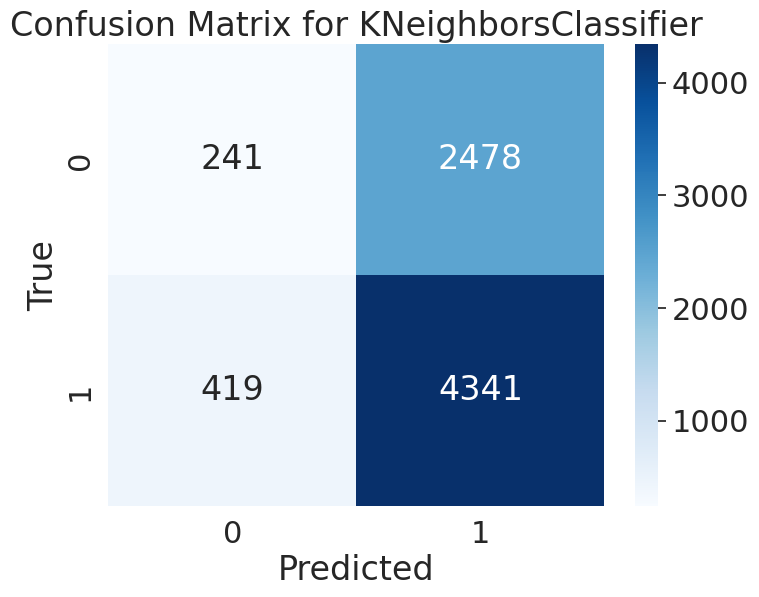

In [346]:
# Plot confusion matrix
class_names=knn.classes_
plt.figure(figsize=(8, 6))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for KNeighborsClassifier')
plt.show()

In [347]:
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 241 2478]
 [ 419 4341]]
              precision    recall  f1-score   support

           0       0.37      0.09      0.14      2719
           1       0.64      0.91      0.75      4760

    accuracy                           0.61      7479
   macro avg       0.50      0.50      0.45      7479
weighted avg       0.54      0.61      0.53      7479



In [348]:
#error = []
#import numpy as np
#import matplotlib.pyplot as plt
# Calculating error for K values between 1 and 40
#for i in range(1, 40):
#    knn = KNeighborsClassifier(n_neighbors=i)
#    knn.fit(X_train, y_train)
#    pred_i = knn.predict(X_test)
#    error.append(np.mean(pred_i != y_test))
#plt.figure(figsize=(12, 6))
#plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
#         markerfacecolor='blue', markersize=10)
#plt.title('Error Rate K Value')
#plt.xlabel('K Value')
#plt.ylabel('Mean Error')


##Decision Tree Classifier

In [366]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42,
                                                    shuffle=True)

In [367]:
#You can view the tree in text format which is tedious
#text_representation = tree.export_text(dec_tree)
#print(text_representation)

In [368]:
#feature_cols = ['Encoded Systemic Illness', 'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection', 'RBC Count', 'WBC Count', 'Home ownership', 'Age', 'Birth Month', 'Health Insurance', 'Sexually Transmitted Infection']
#from sklearn import tree
#fig = plt.figure(figsize=(200,200))
#DT_Graph = tree.plot_tree(dec_tree, feature_names=feature_cols, class_names=['0','1'], filled=True)

In [369]:
#To save the DT graph
#fig.savefig("decistion_tree.png")

In [375]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(criterion="entropy", max_depth=10)

# Train Decision Tree Classifer
dec_tree = dec_tree.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dec_tree.predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 score:",metrics.f1_score(y_test, y_pred))
y_proba = dec_tree.predict_proba(X_test)[:, 1]
score = roc_auc_score(y_test, y_proba)
print(f"ROC AUC score: {score:.4f}")

Number of mislabeled points out of a total 7479 points : 2611
Accuracy: 0.6508891563043188
Precision: 0.6910352187833512
Recall: 0.8163479722630804
F1 score: 0.7484828051247473
ROC AUC score: 0.6362


In [371]:
#fig = plt.figure(figsize=(25,20))
#DT_Graph_pruned = tree.plot_tree(decTree2, feature_names=feature_cols, class_names=['0','1'],filled=True)

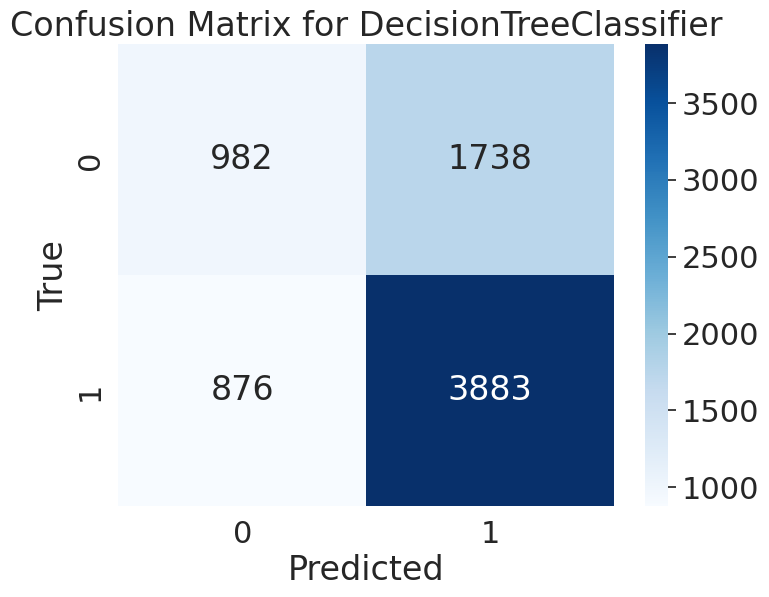

In [372]:
# Plot confusion matrix
class_names=dec_tree.classes_
plt.figure(figsize=(8, 6))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for DecisionTreeClassifier')
plt.show()

In [373]:
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 982 1738]
 [ 876 3883]]
              precision    recall  f1-score   support

           0       0.53      0.36      0.43      2720
           1       0.69      0.82      0.75      4759

    accuracy                           0.65      7479
   macro avg       0.61      0.59      0.59      7479
weighted avg       0.63      0.65      0.63      7479



##SVM with RBF Kernel

In [376]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_normalized,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42,
                                                    shuffle=True)

In [377]:
X_train

,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,RBC Count,WBC Count,Home ownership,Age,Birth Month,Health Insurance,Sexually Transmitted Infection
3142,0.666667,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.887980,0.620769,1.0,0.292683,0.090909,1.0,1.0
8003,0.000000,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.408632,0.673846,1.0,0.975610,0.272727,0.0,1.0
1069,0.666667,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.487729,0.760000,1.0,0.536585,0.636364,1.0,1.0
6797,1.000000,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.502636,0.603692,1.0,0.341463,0.909091,0.0,1.0
12306,0.666667,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.616807,0.358769,1.0,0.170732,0.272727,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12950,0.666667,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.816653,0.105385,1.0,0.926829,0.181818,0.0,1.0
16336,0.333333,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.859848,0.555231,1.0,0.365854,0.000000,0.0,0.0
22125,0.000000,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.022620,0.158308,0.0,0.975610,0.636364,0.0,0.0
15120,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.497492,0.463538,0.0,0.487805,0.454545,1.0,1.0


In [378]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf', gamma="auto", probability=True, class_weight='balanced')
svclassifier.fit(X_train, y_train)

SVC(class_weight='balanced', gamma='auto', probability=True)

In [379]:
y_pred = svclassifier.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 score:",metrics.f1_score(y_test, y_pred))
y_proba = svclassifier.predict_proba(X_test)[:, 1]
score = roc_auc_score(y_test, y_proba)
print(f"ROC AUC score: {score:.4f}")

Number of mislabeled points out of a total 7479 points : 2766
Accuracy: 0.6301644604893702
Precision: 0.7159263271939328
Recall: 0.6942635007354486
F1 score: 0.704928525709409
ROC AUC score: 0.6541


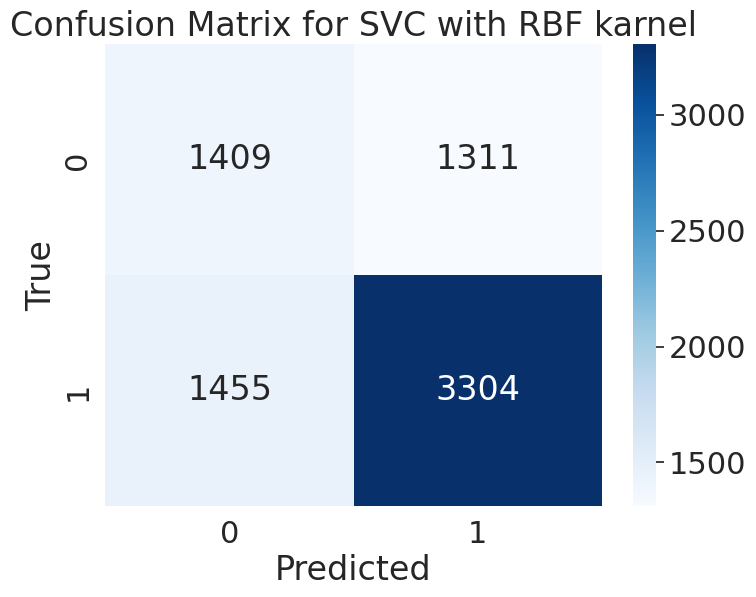

In [380]:
# Plot confusion matrix
class_names=svclassifier.classes_
plt.figure(figsize=(8, 6))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVC with RBF karnel')
plt.show()

In [381]:
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Calculate total number of records
total_records = len(y_test)
print(total_records)
# Calculate confusion matrix proportions
cm_proportions = metrics.confusion_matrix(y_test, y_pred) / total_records

# Interpretation of confusion matrix proportions
print("Confusion Matrix Proportions:")
print(cm_proportions)

[[1409 1311]
 [1455 3304]]
              precision    recall  f1-score   support

           0       0.49      0.52      0.50      2720
           1       0.72      0.69      0.70      4759

    accuracy                           0.63      7479
   macro avg       0.60      0.61      0.60      7479
weighted avg       0.63      0.63      0.63      7479

7479
Confusion Matrix Proportions:
[[0.18839417 0.17529081]
 [0.19454473 0.44177029]]


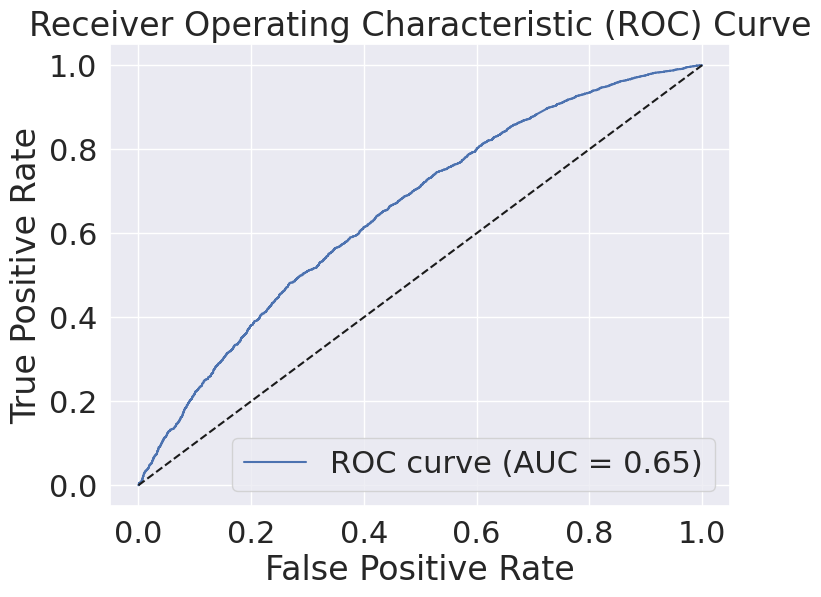

AUC-ROC Score: 0.6540984265107599


In [172]:
# Predict probabilities of class 1 for test data
y_probs = svclassifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_roc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the AUC-ROC score
print("AUC-ROC Score:", auc_roc)

#Task 5 Evaluation: How good are your models and Tuning

In [382]:
from sklearn.model_selection import GridSearchCV

In [383]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42,
                                                    shuffle=True)

# Defining the Naive Bayes model
nb = GaussianNB()

# Define hyperparameters for tuning
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, cv=10, verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Retrain Naive Bayes with the best hyperparameters
best_nb = GaussianNB(**best_params)
best_nb.fit(X_train, y_train)

# Predictions on test set
y_pred = best_nb.predict(X_test)

# Calculate test confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Calculate metrics scores for evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

y_proba = svclassifier.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_proba)

# Display results and observations
print("Estimated Best Hyperparameters:", best_params)
print("Test Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
Best Hyperparameters: {'var_smoothing': 1e-09}
Estimated Best Hyperparameters: {'var_smoothing': 1e-09}
Test Confusion Matrix:
 [[ 746 1974]
 [ 478 4281]]
Accuracy: 0.6721486829790079
Precision: 0.6844124700239809
Recall: 0.8995587308258037
F1-score: 0.7773742509533321
AUC-ROC: 0.6540893879089774


#Combine only two learners in an ensemble voting learner

In [384]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42,
                                                    shuffle=True)

In [388]:
from sklearn.ensemble import VotingClassifier

nb_classifier = GaussianNB(var_smoothing=1e-09)
knn = KNeighborsClassifier(n_neighbors=30)

# Create a voting classifier using soft voting
ensemble_classifier = VotingClassifier(
    estimators=[('nb', nb_classifier), ('knn', knn)],
    voting='soft'  # Using soft voting for probabilities
)

# Train the ensemble classifier
ensemble_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('nb', GaussianNB()),
                             ('knn', KNeighborsClassifier(n_neighbors=30))],
                 voting='soft')

In [389]:
ensemble_classifier.score(X_test, y_test)
# Predictions on test set
y_pred = ensemble_classifier.predict(X_test)

# Calculate test confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Calculate metrics scores for evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

# Display results and observations
print("Test Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Test Confusion Matrix:
 [[   3 2717]
 [   1 4758]]
Accuracy: 0.6365824308062575
Precision: 0.6365217391304347
Recall: 0.9997898718218113
F1-score: 0.7778322707209415


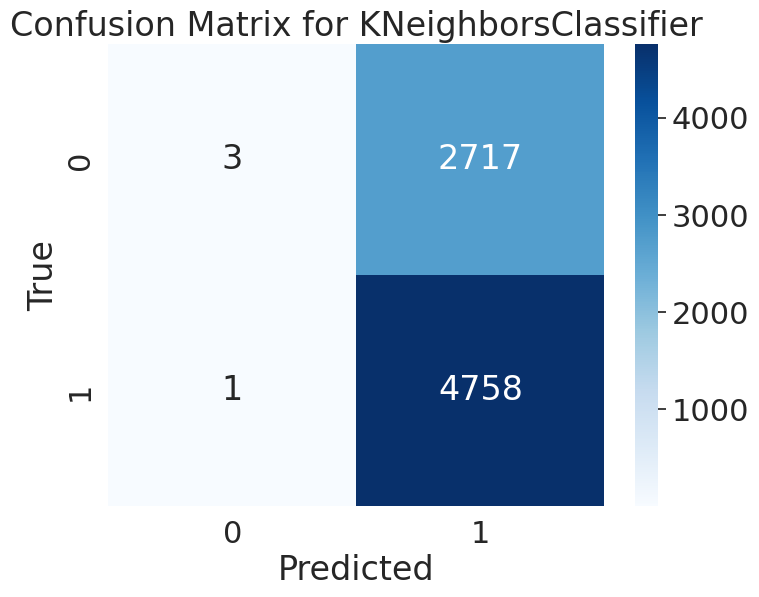

In [391]:
# Plot confusion matrix
class_names=ensemble_classifier.classes_
plt.figure(figsize=(8, 6))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for KNeighborsClassifier')
plt.show()